### Credit Card Fraud Detection Classification Model

This project is the first attempt at building a classification model using the sklearn library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("creditcard.csv")[:50000]

In [9]:
#Number of Fraud cases
df["Class"].sum()

148

In [7]:
x = df.drop(columns=["Time", "Amount", "Class"]).values
y = df["Class"].values

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import confusion_matrix

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=2)

The model used is a LogisticRegression with varying parameters, due to the fact that the dataset is highly unbalanced and the fraud cases could be considered as outliers.
The used metric is "Recall" since the purpose of the model is to find all possible cases of fraud and because we prefer having few false positives rather than missing possible fraud cases.

In [78]:
grid = GridSearchCV(
        estimator=LogisticRegression(max_iter=1000),
        param_grid= {'class_weight': [{0:1, 1:v} for v in np.linspace(1,20,30)]},
        cv = 10,
        scoring={'Precision': make_scorer(precision_score), 'Recall': make_scorer(recall_score)},
        refit='Recall',
        n_jobs=-1
        )
model = grid.fit(X_train, y_train)

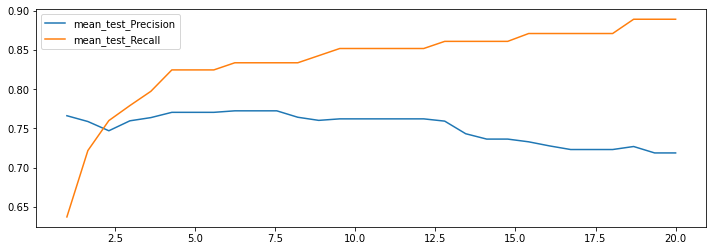

In [98]:
plt.figure(figsize=(12,4))
cv_results = pd.DataFrame(model.cv_results_)
for score in ["mean_test_Precision", "mean_test_Recall"]:
    plt.plot([_[1] for _ in df['param_class_weight']],
            cv_results[score],
            label = score)
plt.legend()
plt.show()

The resulting confusion matrix shows that the model has succesfully managed to spot most fraud cases and only missed 3 of them. In addition, the model has resulted in 13 false positives which could easily be checked by a human operator to properly classify the case as non-fraud.


In [95]:
prediction = model.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, prediction), columns=["Positive", "Negative"])

,Positive,Negative
0,16446,13
1,3,38
